<a href="https://colab.research.google.com/github/shakirhussain128/Data_Analysis.ipynb/blob/main/E_commerce_Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample E-commerce Customer Data
data = {
    "CustomerID": [1,2,3,4,5,6,7,8,9,10],
    "CustomerType": ["New","Repeat","New","Repeat","New",
                     "Repeat","New","Repeat","Repeat","New"],
    "Orders": [1,3,1,5,2,4,1,6,2,1],
    "TotalSpent": [50,300,60,500,120,400,70,600,200,55]
}

df = pd.DataFrame(data)
df


,CustomerID,CustomerType,Orders,TotalSpent
0,1,New,1,50
1,2,Repeat,3,300
2,3,New,1,60
3,4,Repeat,5,500
4,5,New,2,120
5,6,Repeat,4,400
6,7,New,1,70
7,8,Repeat,6,600
8,9,Repeat,2,200
9,10,New,1,55


**Average Order Value (AOV)**

In [2]:
df["AOV"] = df["TotalSpent"] / df["Orders"]
df


,CustomerID,CustomerType,Orders,TotalSpent,AOV
0,1,New,1,50,50.0
1,2,Repeat,3,300,100.0
2,3,New,1,60,60.0
3,4,Repeat,5,500,100.0
4,5,New,2,120,60.0
5,6,Repeat,4,400,100.0
6,7,New,1,70,70.0
7,8,Repeat,6,600,100.0
8,9,Repeat,2,200,100.0
9,10,New,1,55,55.0


**Total Spent by Customer Type**

In [3]:
type_spent = df.groupby("CustomerType")["TotalSpent"].sum()
print(type_spent)


CustomerType
New        355
Repeat    2000
Name: TotalSpent, dtype: int64


**Visualizations**

Total Spending by Customer Type

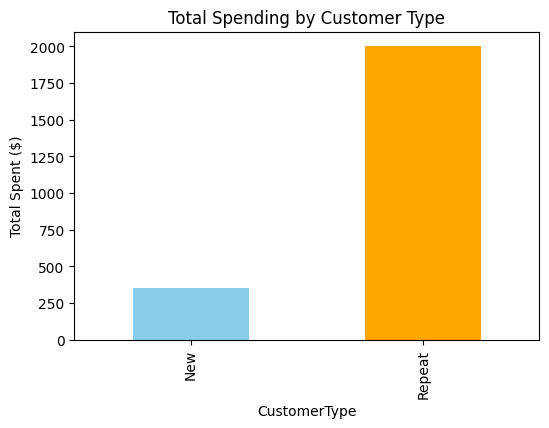

In [4]:
type_spent.plot(kind="bar", figsize=(6,4), color=["skyblue","orange"])
plt.title("Total Spending by Customer Type")
plt.ylabel("Total Spent ($)")
plt.show()


**Orders vs Total Spent Scatter Plot**

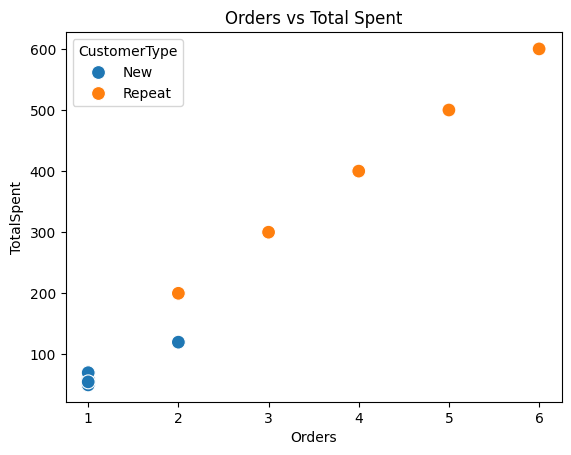

In [5]:
sns.scatterplot(x="Orders", y="TotalSpent", hue="CustomerType", data=df, s=100)
plt.title("Orders vs Total Spent")
plt.show()


**Customer Segmentation**

In [6]:
# Segment by TotalSpent
def segment_customer(x):
    if x > 400:
        return "High-Value"
    elif x > 200:
        return "Medium-Value"
    else:
        return "Low-Value"

df["Segment"] = df["TotalSpent"].apply(segment_customer)
df


,CustomerID,CustomerType,Orders,TotalSpent,AOV,Segment
0,1,New,1,50,50.0,Low-Value
1,2,Repeat,3,300,100.0,Medium-Value
2,3,New,1,60,60.0,Low-Value
3,4,Repeat,5,500,100.0,High-Value
4,5,New,2,120,60.0,Low-Value
5,6,Repeat,4,400,100.0,Medium-Value
6,7,New,1,70,70.0,Low-Value
7,8,Repeat,6,600,100.0,High-Value
8,9,Repeat,2,200,100.0,Low-Value
9,10,New,1,55,55.0,Low-Value


**Segment Count Visualization**

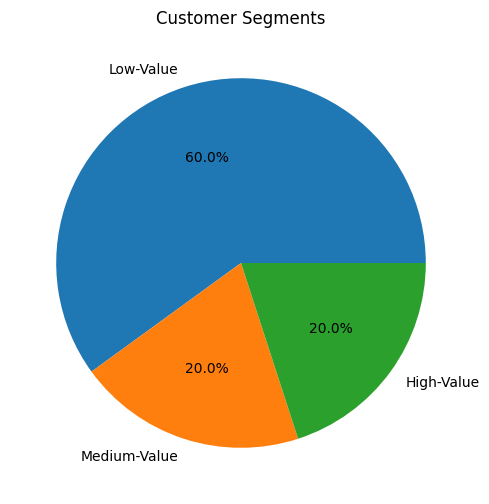

In [7]:
df["Segment"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(6,6))
plt.title("Customer Segments")
plt.ylabel("")
plt.show()
